In [1]:
# !pip install kiwipiepy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install ipython-autotime

# ■ 모듈 선언

In [2]:
# 셀 별로 러닝타임 측정
%load_ext autotime

time: 0 ns (started: 2024-04-02 02:58:19 +09:00)


In [3]:
from kiwipiepy import Kiwi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

time: 2.08 s (started: 2024-04-02 02:58:19 +09:00)


# ■ 형태소 분석 및 토큰화

In [4]:
# Kiwi 선언
kiwi = Kiwi()

time: 812 ms (started: 2024-04-02 02:58:21 +09:00)


In [5]:
# 진단기준 선언
# GPT4와 상진이가 번역한 것을 합침

mental_disorder = {
    'obsessive_compulsive_disorder': [
        '재발성 및 지속적인 생각, 충동 또는 이미지가 방해 기간 동안 침입적이고 원치 않는 것으로 경험되며, 대부분의 개인에게는 뚜렷한 불안이나 고통을 유발합니다.',
        '개인은 이러한 생각, 충동, 또는 이미지를 무시하거나 억제하려고 하거나, 어떤 다른 생각이나 행동(즉, 강박 행동을 수행함)으로 중화하려고 시도합니다.',
        '강박 증상에 대응하거나 엄격하게 적용해야 하는 규칙에 따라 수행하게 되는 반복적인 행동(예: 손 씻기, 정리, 확인) 또는 정신적 행위(예: 기도, 계산, 조용히 단어 반복)입니다.',
        '이러한 행동이나 정신적 행위는 불안이나 고통을 예방하거나 감소시키거나, 어떤 두려운 사건이나 상황을 예방하는 것을 목표로 하지만, 이 행동이나 정신적 행위는 그것들을 중화하거나 예방하는 것과 현실적으로 연결되지 않거나 분명히 과도합니다.',
        '강박 증상 또는 강박 행동이 시간을 많이 소모합니다(예: 하루에 1시간 이상 소요) 또는 사회적, 직업적 또는 기타 중요한 기능 영역에서 임상적으로 중요한 고통이나 장애를 유발합니다.',
        '방해적이고 원치 않는 것으로 경험되며 대부분의 개인에게 현저한 불안이나 고통을 유발하는 반복적이고 지속적인 생각, 충동 또는 이미지',
        '그러한 생각, 충동 또는 이미지를 무시하거나 억제하려고 시도하거나 다른 생각이나 행동으로 이를 중화하려고 시도합니다',
        '강박관념에 대한 반응으로 또는 엄격하게 적용해야 하는 규칙에 따라 수행해야 한다고 느끼는 반복적 행동 또는 정신적 활동',
        '행동이나 정신적 행위가 불안이나 괴로움을 예방 또는 감소시키거나 두려운 사건이나 상황을 예방하는 것을 목표로 하지만, 현실적으로 연결되지 않거나 과도합니다',
        '강박사고나 강박행동은 시간이 많이 걸리거나(예: 하루에 1시간 이상 소요) 사회적, 직업적 또는 기타 중요한 기능 영역에서 임상적으로 심각한 고통이나 손상을 초래합니다',
        '강박 증상은 물질의 생리적 효과나 다른 의학적 상태로 인한 것이 아닙니다',
        '장애가 다른 정신 장애의 증상으로 더 잘 설명되지 않습니다'
    ],
    'posttraumatic_stress_disorder': [
        '실제 또는 위협적인 죽음, 심각한 상해, 또는 성폭력에 노출되는 것으로, 다음 중 하나(또는 그 이상)의 방식으로 발생합니다: 직접 경험, 다른 사람에게 발생한 사건을 직접 목격, 친한 가족 구성원 또는 친한 친구에게 발생한 외상 사건을 알게 됨, 외상 사건의 불쾌한 세부 사항에 반복적으로 또는 극단적으로 노출됨.',
        '외상 사건과 관련된 하나(또는 그 이상)의 침입 증상이 외상 사건 발생 후 나타남.',
        '외상 사건과 관련된 자극에 대한 지속적인 회피.',
        '외상 사건과 관련된 인지 및 기분의 부정적 변화.',
        '외상 사건과 관련된 각성 및 반응성의 뚜렷한 변화.',
        '장애의 지속 기간이 1개월 이상임.',
        '장애가 사회적, 직업적 또는 기타 중요한 기능 영역에서 임상적으로 중요한 고통이나 장애를 유발함.',
        '실제 또는 위협적인 죽음, 심각한 부상 또는 성폭력에 노출됩니다',
        '외상적 사건에 대한 반복적이고 비자발적이며 침해적인 고통스러운 기억',
        '꿈의 내용 및/또는 영향이 외상적 사건과 관련되어 있는 반복되는 고통스러운 꿈',
        '개인이 외상성 사건이 재발하는 것처럼 느끼거나 행동하는 해리 반응',
        '외상적 사건의 측면을 상징하는 내부 또는 외부 단서에 대한 강렬하거나 장기간의 심리적 고통 또는 생리적 반응',
        '외상성 사건과 관련된 자극을 지속적으로 회피',
        '외상성 사건과 관련된 인지 및 기분의 부정적 변화',
        '외상성 사건과 관련된 각성 및 반응성의 현저한 변화',
        '장애 기간이 1개월을 초과합니다',
        '장애는 사회적, 직업적 또는 기타 중요한 기능 영역에서 임상적으로 심각한 고통이나 손상을 초래합니다',
        '장애는 물질의 생리적 효과나 다른 의학적 상태로 인한 것이 아닙니다'
        ],
    'paranoid_personality_disorder': [
        '타인에 대한 만연한 불신과 의심이 있어서, 그들의 동기가 악의적으로 해석되며, 성인 초기부터 시작하여 다양한 상황에서 나타남.',
        '충분한 근거 없이 타인이 자신을 이용하거나 해치거나 속이고 있다고 의심함.',
        '친구나 동료의 충성심이나 신뢰성에 대해 근거 없는 의심에 사로잡혀 있음.',
        '정보가 악의적으로 사용될 것이라는 근거 없는 두려움 때문에 다른 사람에게 신뢰하기를 꺼림.',
        '해가 없는 말이나 사건에 숨겨진 비하적이거나 위협적인 의미를 읽어냄.',
        '지속적으로 원한을 품음 (즉, 모욕, 상해, 또는 경시에 대해 용서하지 않음).',
        '타인에게는 분명하지 않은 자신의 성격이나 명성에 대한 공격을 인지하며, 이에 대해 빠르게 화를 내거나 반격함.',
        '배우자나 성적 파트너의 충실성에 대해 근거 없는 반복적인 의심을 함.',
        '조현병, 양극성 장애 또는 우울 장애의 정신병적 특징, 또는 다른 정신병적 장애의 과정 중에만 발생하지 않으며, 다른 의학적 상태의 생리적 효과에 기인하는 것이 아님.',
        '타인에 대한 광범위한 불신과 의심이 초기 성인기에 시작되어 다양한 상황에서 나타납니다',
        '충분한 근거 없이 다른 사람들이 자신을 착취하거나 해를 끼치거나 속이고 있다고 의심합니다',
        '친구나 동료의 충성심이나 신뢰성에 대한 부당한 의심에 사로잡혀 있습니다',
        '정보가 자신에게 불리하게 사용될 것이라는 부당한 두려움 때문에 다른 사람에게 비밀을 털어놓는 것을 꺼립니다',
        '온화한 발언이나 사건에 숨겨진 비하하거나 위협적인 의미를 읽어냅니다',
        '지속적으로 원한을 풉니다(즉, 모욕, 부상 또는 경멸을 용서하지 않습니다)',
        '다른 사람에게는 드러나지 않는 자신의 성격이나 평판에 대한 공격을 인지하고 신속하게 화를 내거나 반격합니다',
        '정당한 사유 없이 배우자나 성 파트너의 정절에 대해 반복적으로 의심을 풉니다',
        '정신분열증, 양극성 장애, 정신병적 특징을 지닌 우울 장애, 또는 다른 정신병적 장애가 진행되는 동안에만 발생하지 않으며, 다른 의학적 상태의 생리적 효과로 인한 것이 아닙니다'
        ]
}


time: 0 ns (started: 2024-04-02 02:58:22 +09:00)


In [6]:
add_word = {
    '과다수면증' : 'NNG',
    '수면과다증' : 'NNG',
    '무가치' : 'NNG',
    '무가치감' : 'NNG',
    '부적절' : 'NNG',
    '불만족' : 'NNG',
    '심각' : 'NNG',
}
for k, v in add_word.items():
    kiwi.add_user_word(k, v)

time: 0 ns (started: 2024-04-02 02:58:22 +09:00)


In [7]:
# 체언(NNG, NNP,  NR, NP), 용언(VX, VCN), 어근에 해당 하는 품사와 일반 부사(MAG), 체언 접두사(XPN)만을 선별
target_tags = ['NNG', 'NNP', 'NR', 'NP', 'VCN', 'MAG', 'XPN']
token_disorder = {}
for key in mental_disorder.keys():
    token_list = []
    for sentence in mental_disorder[key]:
        print(f'token : {sentence}')
        tokens = kiwi.tokenize(sentence)
        token_list.append([token.form for token in tokens if token.tag in target_tags])
    token_list = sum(token_list, [])
    token_disorder[key] = token_list

token : 재발성 및 지속적인 생각, 충동 또는 이미지가 방해 기간 동안 침입적이고 원치 않는 것으로 경험되며, 대부분의 개인에게는 뚜렷한 불안이나 고통을 유발합니다.
token : 개인은 이러한 생각, 충동, 또는 이미지를 무시하거나 억제하려고 하거나, 어떤 다른 생각이나 행동(즉, 강박 행동을 수행함)으로 중화하려고 시도합니다.
token : 강박 증상에 대응하거나 엄격하게 적용해야 하는 규칙에 따라 수행하게 되는 반복적인 행동(예: 손 씻기, 정리, 확인) 또는 정신적 행위(예: 기도, 계산, 조용히 단어 반복)입니다.
token : 이러한 행동이나 정신적 행위는 불안이나 고통을 예방하거나 감소시키거나, 어떤 두려운 사건이나 상황을 예방하는 것을 목표로 하지만, 이 행동이나 정신적 행위는 그것들을 중화하거나 예방하는 것과 현실적으로 연결되지 않거나 분명히 과도합니다.
token : 강박 증상 또는 강박 행동이 시간을 많이 소모합니다(예: 하루에 1시간 이상 소요) 또는 사회적, 직업적 또는 기타 중요한 기능 영역에서 임상적으로 중요한 고통이나 장애를 유발합니다.
token : 방해적이고 원치 않는 것으로 경험되며 대부분의 개인에게 현저한 불안이나 고통을 유발하는 반복적이고 지속적인 생각, 충동 또는 이미지
token : 그러한 생각, 충동 또는 이미지를 무시하거나 억제하려고 시도하거나 다른 생각이나 행동으로 이를 중화하려고 시도합니다
token : 강박관념에 대한 반응으로 또는 엄격하게 적용해야 하는 규칙에 따라 수행해야 한다고 느끼는 반복적 행동 또는 정신적 활동
token : 행동이나 정신적 행위가 불안이나 괴로움을 예방 또는 감소시키거나 두려운 사건이나 상황을 예방하는 것을 목표로 하지만, 현실적으로 연결되지 않거나 과도합니다
token : 강박사고나 강박행동은 시간이 많이 걸리거나(예: 하루에 1시간 이상 소요) 사회적, 직업적 또는 기타 중요한 기능 영역에서 임상적으로 심각한 고통이나 손상을 초래합니다
token : 강박 증상은 물질의 생리적

In [8]:
token_disorder_unique = {}

for key, tokens in token_disorder.items():
    # 중복을 제거하기 위해 set으로 변환
    unique_tokens = set(tokens)
    # 다시 리스트로 변환하여 저장
    token_disorder_unique[key] = list(unique_tokens)
    print(f"{key}\n중복 제거 전/후 토큰 개수: {len(tokens)} => {len(unique_tokens)}\n")

# 결과 출력
for disorder, tokens in token_disorder_unique.items():
    print(f"{disorder}: {tokens}")

obsessive_compulsive_disorder
중복 제거 전/후 토큰 개수: 184 => 83

posttraumatic_stress_disorder
중복 제거 전/후 토큰 개수: 175 => 79

paranoid_personality_disorder
중복 제거 전/후 토큰 개수: 158 => 82

obsessive_compulsive_disorder: ['활동', '규칙', '영역', '소모', '시간', '원', '물질', '임상', '현실', '행위', '계산', '증상', '초래', '이상', '침입', '장애', '대응', '하루', '예', '의학', '방해', '소요', '대부분', '그것', '반복', '기타', '아니', '잘', '사회', '즉', '생각', '정신', '효과', '기간', '반응', '무시', '괴로움', '과도', '상태', '재발', '조용히', '기도', '분명히', '중요', '설명', '개인', '생리', '관념', '확인', '목표', '중화', '손상', '단어', '지속', '기능', '직업', '억제', '정리', '상황', '강박', '감소', '불안', '경험', '사건', '및', '행동', '엄격', '이미지', '고통', '동안', '예방', '많이', '이', '사고', '또는', '시도', '충동', '적용', '더', '수행', '연결', '손', '유발']
posttraumatic_stress_disorder: ['내용', '극단', '꿈', '영역', '물질', '기억', '성폭력', '임상', '영향', '해리', '증상', '초래', '사항', '이상', '침해', '세부', '침입', '장애', '의학', '관련', '자발', '각성', '발생', '심리', '반복', '측면', '기타', '단서', '아니', '사회', '부상', '효과', '변화', '인지', '기간', '반응', '비', '친구', '노출', '상해', '가족', '상태', '재발', '자극', '다음'

In [9]:
'''
# 제거할 토큰 기준
- 직접적인 관련이 적은 일반적인 단어: '이', '그것', '및', '또는', '즉' 등
- 문맥상 중요성이 낮은 단어: '잘', '더', '많이'와 같은 부사 등
- 부정을 직접 나타내지 않는 단어: '아니'같은 의미없는 부정 등
- 수량이나 정도를 나타내는 단어: '하나', '기타' 등
- 질환의 진단과 덜 연관된 단어: 예를 들어, '성인기', '진행', '시작' 등 (심리적 특성이나 행동 양식과 무관)
'''
remove_tokens = [
    "그", "그것", "기타", "다음", "더", "또는", "많이", "및", "분명", "성인기", "시작", "아니", "없이", "이", "잘", "즉", "진행", "하나"
]

filtered_token_disorder = dict()
# 제거할 토큰 리스트를 제외시키는 코드
for disorder, tokens in token_disorder_unique.items():
    # 제거할 토큰들을 제외한 새로운 토큰 리스트 생성
    filtered_tokens = [token for token in tokens if token not in remove_tokens and len(token) > 1]
    # 필터링된 토큰 리스트 할당
    filtered_token_disorder[disorder] = filtered_tokens
    print(f"{disorder}\n의미없는 토큰 제거 전/후: {len(tokens)} => {len(filtered_tokens)}\n")

obsessive_compulsive_disorder
의미없는 토큰 제거 전/후: 83 => 70

posttraumatic_stress_disorder
의미없는 토큰 제거 전/후: 79 => 70

paranoid_personality_disorder
의미없는 토큰 제거 전/후: 82 => 68

time: 0 ns (started: 2024-04-02 02:58:23 +09:00)


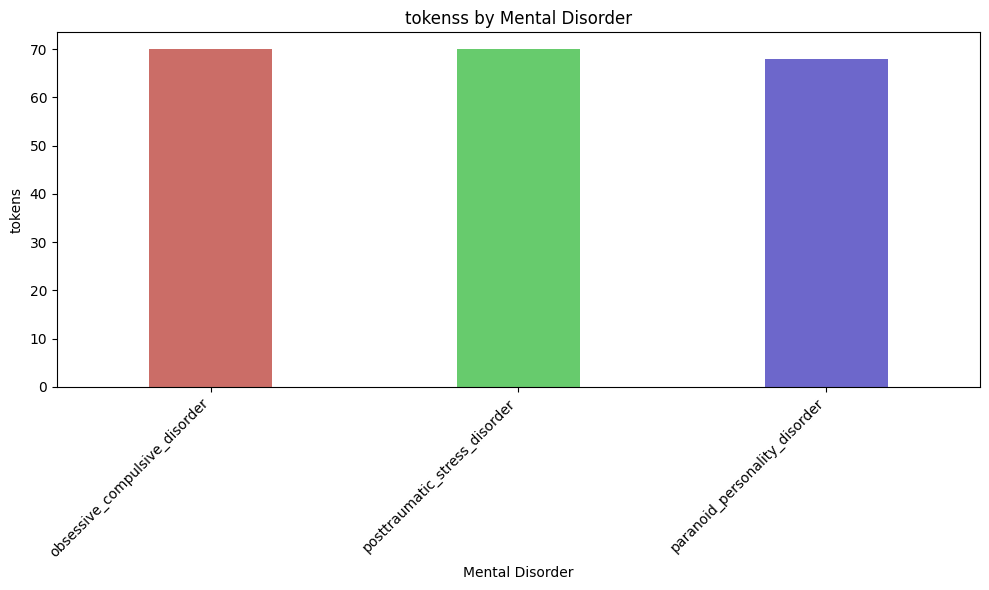

time: 188 ms (started: 2024-04-02 02:58:23 +09:00)


In [10]:
'''각 정신질환별 토큰 개수 계산'''
disorder_names = list(filtered_token_disorder.keys())
token_counts = [len(tokens) for tokens in filtered_token_disorder.values()]

# 토큰 개수 데이터프레임
token_counts_df = pd.DataFrame({
    'Mental Disorder': disorder_names,
    'tokens': token_counts
})

# seaborn으로 막대 그래프 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Mental Disorder',
            y='tokens',
            data=token_counts_df,
            palette='hls',
            hue='Mental Disorder',
            legend=False,
            width=0.4)

plt.title('tokenss by Mental Disorder')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [11]:
df = pd.DataFrame({
    'mental_disorder': filtered_token_disorder.keys(),
    'tokens': filtered_token_disorder.values()
})
df

,mental_disorder,tokens
0,obsessive_compulsive_disorder,"[활동, 규칙, 영역, 소모, 시간, 물질, 임상, 현실, 행위, 계산, 증상, 초..."
1,posttraumatic_stress_disorder,"[내용, 극단, 영역, 물질, 기억, 성폭력, 임상, 영향, 해리, 증상, 초래, ..."
2,paranoid_personality_disorder,"[공격, 배우자, 발언, 모욕, 분열증, 반격, 불리, 기인, 과정, 신속, 동기,..."


time: 15 ms (started: 2024-04-02 02:58:24 +09:00)


In [12]:
df.to_csv('진단기준_토큰.csv', encoding='utf-8', index = False)

time: 16 ms (started: 2024-04-02 02:58:24 +09:00)


# ■ 단어사전 증강

In [13]:
# !pip install gensim
# !pip install wget
# !pip install gunzip
# !python -m wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ko.300.bin.gz
# !python -m gzip -d cc.ko.300.bin.gz

time: 0 ns (started: 2024-04-02 02:58:24 +09:00)


In [14]:
import pandas as pd
import ast

try:
    if filtered_token_disorder is not None:
        filtered_token_disorder = df
        
except:
    filtered_token_disorder = pd.read_csv("./진단기준_토큰.csv")
    # 열의 모든 데이터를 리스트로 변환
    filtered_token_disorder['tokens'] = filtered_token_disorder['tokens'].apply(ast.literal_eval)

time: 0 ns (started: 2024-04-02 02:58:24 +09:00)


In [15]:
'''사전 훈련된 모델 로드'''
import re
import os
from gensim.models import Word2Vec, KeyedVectors
from gensim.models.fasttext import load_facebook_vectors

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# # 기본 Word2Vec (데이터셋 필요)
# token_arr = [row for row in filtered_token_disorder['tokens']]
# token_arr = sum(token_arr, [])
# word_vectors = Word2Vec(token_arr, vector_size=100, window=5, min_count=1, sg=0).wv

# 사전 훈련된 모델 파일 경로
model_path = 'cc.ko.300.bin'
word_vectors = load_facebook_vectors(model_path)

print()


time: 1min 41s (started: 2024-04-02 02:58:24 +09:00)


In [16]:
# # # 작동 실험
# # # for w, sim in word_vectors.most_similar('우울증', 10):
# # #     print(f'{w}: {sim}')

# # 작동 실험2
# keyword = filtered_token_disorder['tokens'].iloc[0][5]
# print(keyword)
# for w, sim in word_vectors.most_similar(keyword, 5):
#     print(f'{w}: {sim}')

time: 15 ms (started: 2024-04-02 03:00:05 +09:00)


In [17]:
'''
유사한 단어 찾기 및 단어사전에 추가
※문제점: 한자가 나오거나 너무 동떨어진 단어 추가 발생 => 한자 정규식 확인 및 유사도 일정 수치 이하 탈락시킴
'''

def is_hanja(word):
    # 한자 범위를 정규 표현식으로 정의
    hanja_range = re.compile(r'[\u4e00-\u9fff]+')
    return hanja_range.search(word) is not None

def augment_dictionary_with_similar_words(model, word_dictionary, top_n=3, similarity_threshold=0.7):
    augmented_dictionary = {}
    new_tokens_added = {}
    token_similar_words_added = {}  # 어떤 토큰에서 어떤 유사한 단어들이 추가되었는지 기록
    
    for disorder, tokens in zip(word_dictionary["mental_disorder"], word_dictionary["tokens"]):
        augmented_tokens = tokens.copy()
        new_tokens_for_disorder = []
        token_similar_words = {}  # 현재 질환에 대해 토큰별 추가된 유사한 단어들
        
        for token in tokens:
            try:
                similar_words = model.most_similar(token, topn=top_n)
                similar_words_added = []  # 현재 토큰에 대해 추가된 유사한 단어들
                
                for word, similarity in similar_words:
                    # 유사도가 임계값 이상이고, 한자가 아니며, 아직 추가되지 않은 경우
                    if similarity >= similarity_threshold and not is_hanja(word) and word not in augmented_tokens:
                        augmented_tokens.append(word)
                        new_tokens_for_disorder.append(word)
                        similar_words_added.append(word)
                        
                if similar_words_added:  # 현재 토큰에 대해 추가된 유사한 단어가 있는 경우
                    token_similar_words[token] = similar_words_added
                    
            except KeyError:
                continue
                
        augmented_dictionary[disorder] = augmented_tokens
        new_tokens_added[disorder] = new_tokens_for_disorder
        token_similar_words_added[disorder] = token_similar_words

    return augmented_dictionary, new_tokens_added, token_similar_words_added

# 
augmented_filtered_token_disorder, new_tokens_added, token_similar_words_added = augment_dictionary_with_similar_words(word_vectors, filtered_token_disorder, top_n=5, similarity_threshold=0.65)

# 어떤 토큰에서 어떤 유사한 단어들이 추가되었는지 출력
for disorder, tokens_info in token_similar_words_added.items():
    print(f"Disorder: {disorder}")
    for token, similar_words in tokens_info.items():
        print(f"  Token '{token}' added similar words: {similar_words}")

print()


Disorder: obsessive_compulsive_disorder
  Token '의학' added similar words: ['댁크레이']
  Token '대부분' added similar words: ['대부분의']
  Token '사회' added similar words: ['정치', '경제']
  Token '정신' added similar words: ['못차린', '못차리는', '차려보면']
  Token '단어' added similar words: ['숙어']
  Token '기능' added similar words: ['기능과']
  Token '감소' added similar words: ['증가', '증대']
  Token '이미지' added similar words: ['이미지의', '보기한국']
  Token '동안' added similar words: ['내내']
  Token '예방' added similar words: ['예방과']
Disorder: posttraumatic_stress_disorder
  Token '기억' added similar words: ['상실증']
  Token '성폭력' added similar words: ['성폭력과', '성폭력의']
  Token '해리' added similar words: ['터틀도브']
  Token '의학' added similar words: ['댁크레이']
  Token '사회' added similar words: ['정치', '경제']
  Token '변화' added similar words: ['변화와']
  Token '기간' added similar words: ['동안']
  Token '상해' added similar words: ['북경']
  Token '기능' added similar words: ['기능과']
  Token '내부' added similar words: ['입구4']
  Token '기분' added similar w

In [18]:
df = pd.DataFrame({
    'mental_disorder': augmented_filtered_token_disorder.keys(),
    'tokens': augmented_filtered_token_disorder.values()
})
df
df.to_csv('진단기준_토큰(유사도증강).csv', encoding='utf-8', index = False)

time: 47 ms (started: 2024-04-02 03:00:28 +09:00)
